## Boston House Price Prediction 

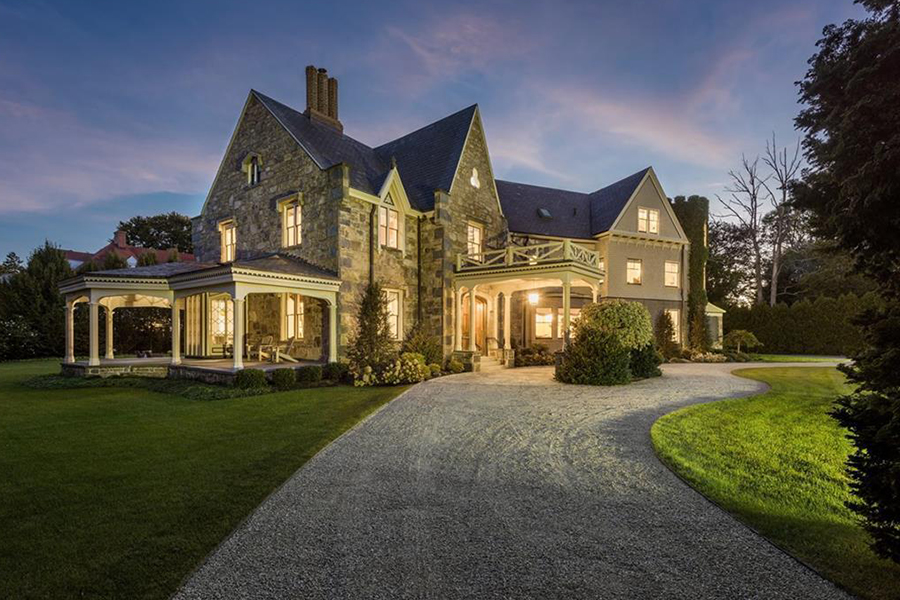

### In this project we are going to do perdict the house price based on some of the feature.Ok let's get start the prediction!!!

### Import the Libraires and Dataset

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
# Import the train dataset 
df = pd.read_csv("train.csv")
df.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


### Data Preprocessing

In [3]:
# Shape of dataset
print("Shape of Trainnig dataset:", df.shape)

Shape of Trainnig dataset: (333, 15)


In [4]:
# Checking null values for training dataset
df.isnull().sum()

ID         0
crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

In [5]:
# Here lets change 'medv' column name to 'Price'
df.rename(columns={'medv':'Price'},inplace=True)

In [6]:
# Information about the training dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 15 columns):
ID         333 non-null int64
crim       333 non-null float64
zn         333 non-null float64
indus      333 non-null float64
chas       333 non-null int64
nox        333 non-null float64
rm         333 non-null float64
age        333 non-null float64
dis        333 non-null float64
rad        333 non-null int64
tax        333 non-null int64
ptratio    333 non-null float64
black      333 non-null float64
lstat      333 non-null float64
Price      333 non-null float64
dtypes: float64(11), int64(4)
memory usage: 39.1 KB


In [7]:
# Describe
df.describe()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,Price
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,250.951952,3.360341,10.689189,11.293483,0.060060,0.557144,6.265619,68.226426,3.709934,9.633634,409.279279,18.448048,359.466096,12.515435,22.768769
std,147.859438,7.352272,22.674762,6.998123,0.237956,0.114955,0.703952,28.133344,1.981123,8.742174,170.841988,2.151821,86.584567,7.067781,9.173468
min,1.000000,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,188.000000,12.600000,3.500000,1.730000,5.000000
25%,123.000000,0.078960,0.000000,5.130000,0.000000,0.453000,5.884000,45.400000,2.122400,4.000000,279.000000,17.400000,376.730000,7.180000,17.400000
50%,244.000000,0.261690,0.000000,9.900000,0.000000,0.538000,6.202000,76.700000,3.092300,5.000000,330.000000,19.000000,392.050000,10.970000,21.600000
75%,377.000000,3.678220,12.500000,18.100000,0.000000,0.631000,6.595000,93.800000,5.116700,24.000000,666.000000,20.200000,396.240000,16.420000,25.000000
max,506.000000,73.534100,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,37.970000,50.000000


In [8]:
df.drop(['ID'],axis=1,inplace=True)

### Exploratory Data Analysis

In [9]:
# Let's know more about the data features

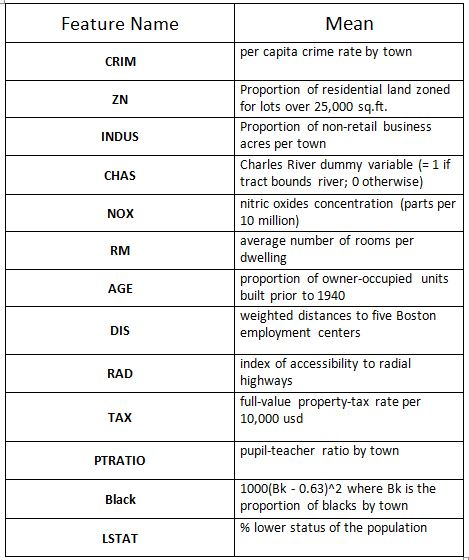

In [10]:
# Finding out the correlation between the features
corr = df.corr()
corr.shape

(14, 14)

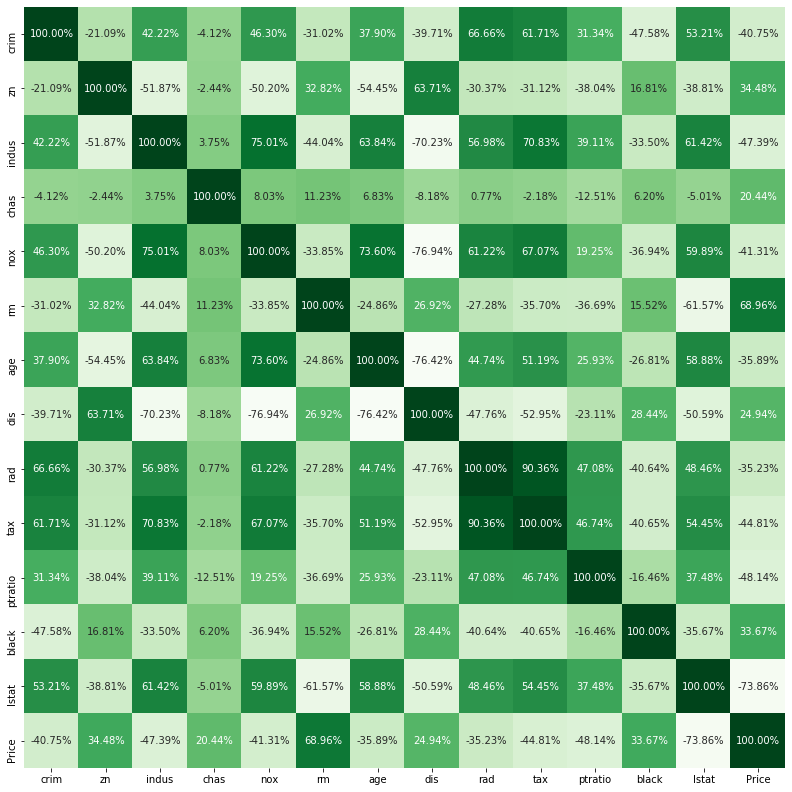

In [11]:
# Plotting the heatmap of correlation between features
plt.figure(figsize=(14,14))
sns.heatmap(corr, cbar=False, square= True, fmt='.2%', annot=True, cmap='Greens')

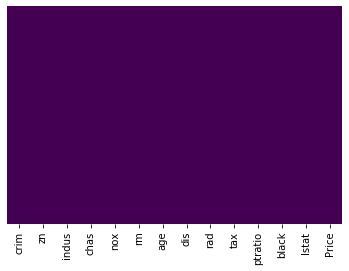

In [12]:
# Checking the null values using heatmap
# There is any null values are occupyed here
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

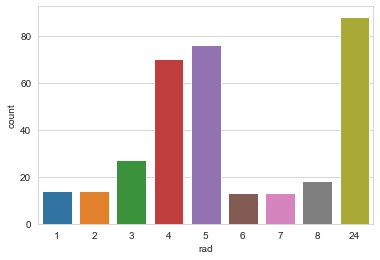

In [13]:
sns.set_style('whitegrid')
sns.countplot(x='rad',data=df)

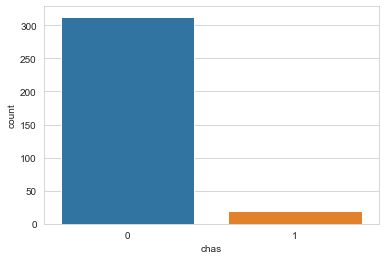

In [14]:
sns.set_style('whitegrid')
sns.countplot(x='chas',data=df)

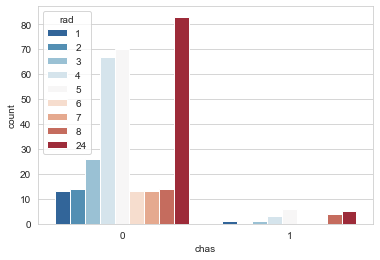

In [15]:
sns.set_style('whitegrid')
sns.countplot(x='chas',hue='rad',data=df,palette='RdBu_r')

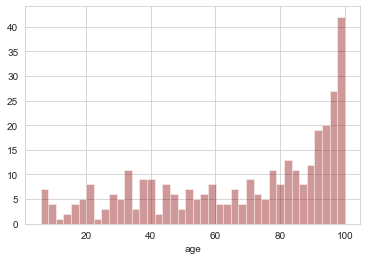

In [16]:
sns.distplot(df['age'].dropna(),kde=False,color='darkred',bins=40)

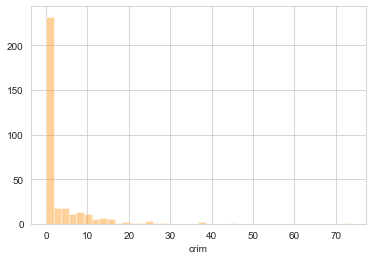

In [17]:
sns.distplot(df['crim'].dropna(),kde=False,color='darkorange',bins=40)

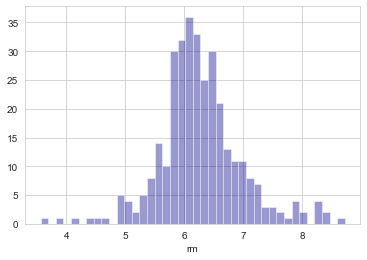

In [18]:
sns.distplot(df['rm'].dropna(),kde=False,color='darkblue',bins=40)

## Feature Selection

In [19]:
# Lets try to understand which are important feature for this dataset
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [20]:
X = df.iloc[:,0:13]  #independent columns
y = df.iloc[:,-1]    #target column i.e price range

In [21]:
X.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
4,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43


In [22]:
y = np.round(df['Price'])

In [23]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=5)
fit = bestfeatures.fit(X,y)

In [24]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [25]:
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns

In [26]:
featureScores

,Specs,Score
0,crim,3251.396750
1,zn,4193.279045
2,indus,618.607714
3,chas,49.220803
4,nox,3.292260
5,rm,14.620403
6,age,1659.128989
7,dis,106.642659
8,rad,879.520751
9,tax,9441.032032


In [27]:
print(featureScores.nlargest(5,'Score'))  #print 5 best features

    Specs        Score
9     tax  9441.032032
1      zn  4193.279045
0    crim  3251.396750
11  black  2440.426651
6     age  1659.128989


### Feature Importance

In [28]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                     oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [29]:
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

[0.10432514 0.02563423 0.05073379 0.013828   0.06489129 0.13411392
 0.12283801 0.1061588  0.04254986 0.0535126  0.05118633 0.10686937
 0.12335867]


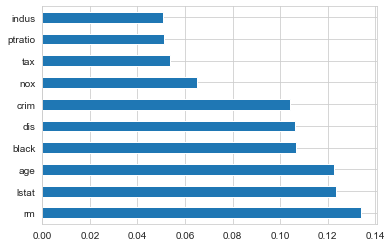

In [30]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

## Model Fitting 

### Linear Regression

In [31]:
# Values Assigning
X = df.iloc[:,0:13]
y = df.iloc[:,-1]

In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.10,random_state=0)

In [33]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
y_pred = model.predict(X_train)

In [35]:
print("Training Accuracy:",model.score(X_train,y_train)*100)

Training Accuracy: 71.8332665226917


In [36]:
print("Training Accuracy:",model.score(X_test,y_test)*100)

Training Accuracy: 83.95119373733449


In [37]:
from sklearn.metrics import mean_squared_error, r2_score

In [38]:
print("Model Accuracy:",r2_score(y,model.predict(X))*100)

Model Accuracy: 73.16960884575647


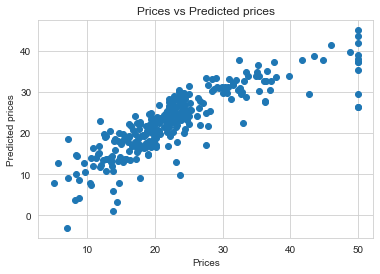

In [39]:
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

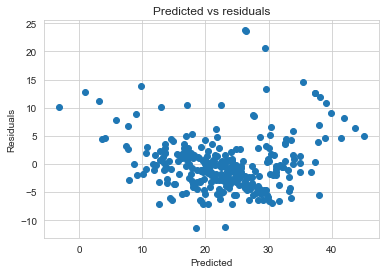

In [40]:
# Checking residuals
plt.scatter(y_pred,y_train-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

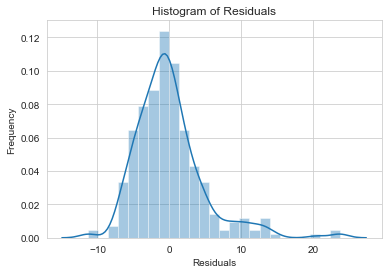

In [41]:
# Checking Normality of errors
sns.distplot(y_train-y_pred)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

## Random Forest Regressor

In [42]:
X = df.iloc[:,[-1,5,10,4,9]]
y = df.iloc[:,[-1]]

In [43]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.10,random_state=0)

In [44]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor()
reg.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [45]:
y_pred = reg.predict(X_train)

In [46]:
print("Training Accuracy:",reg.score(X_train,y_train)*100)

Training Accuracy: 99.98623792197392


In [47]:
print("Testing Accuracy:",reg.score(X_test,y_test)*100)

Testing Accuracy: 99.81895283564613


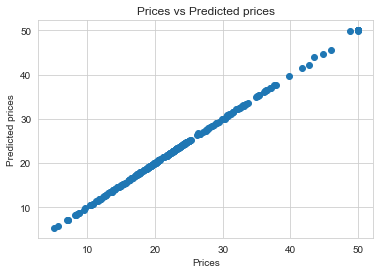

In [48]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

### Finally We Made it!!!

#### Linear Regression

**Model Score:** 73.1% Accuracy <br/>
**Tarining Accuracy:** 71.8% Accuracy <br/>
**Testing Accuracy:** 83.9% Accuracy

#### Random Forest Regressor 
**Tarining Accuracy:** 99.9% Accuracy <br/>
**Testing Accuracy:** 99.8% Accuracy

